In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline


## Importing CV2 and using it to read the image

In [2]:
import cv2 as cv

In [20]:
img = cv.imread("download.jpeg")

In [5]:
print(img.shape)

(175, 287, 3)


In [6]:
print(img.dtype)

uint8


#### Using Matplotlib to show the images

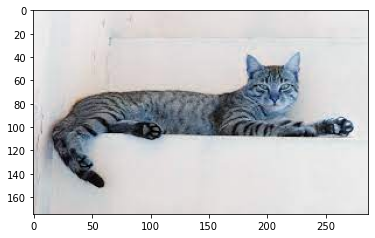

In [21]:
plt.imshow(img,'gray')

### Image ROI

We would many times need to have a specific Region of Interest(ROI) in an image and thus we can carve that out using indexes.

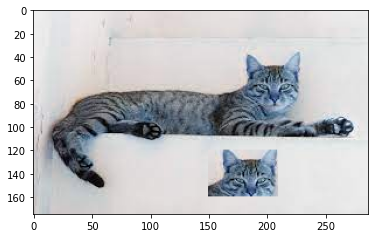

In [22]:
#Face y = [40,80], x = [170,230]
img1 = np.copy(img)
face = img1[40:80,170:230]
img1[120:160,150:210] = face
plt.imshow(img1,'gray')

### Splitting and Merging using indexes.

We can use cv.split() function which returns a tuple (b,g,r) but it is a costly fucntion. Thus we use numpy indexing to split the channels

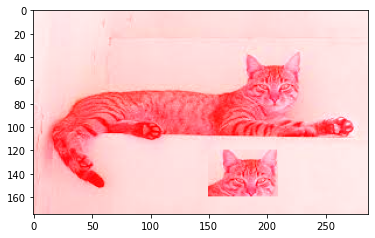

In [24]:
img1[:,:,0] = 255
plt.imshow(img1)

### Adding two images

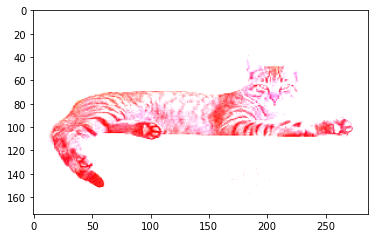

In [25]:
img3 = cv.add(img,img1)
plt.imshow(img3)

Image blending is also image addition but with weightage given to every image is different

In [30]:
img_blended = cv.addWeighted(img,0.6,img1,0.4,0)

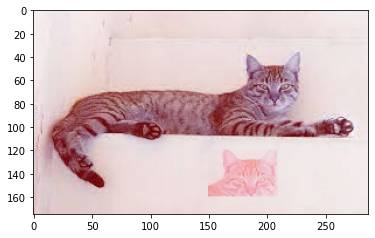

In [31]:
plt.imshow(img_blended)

## Changing Colorspace

In [32]:
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

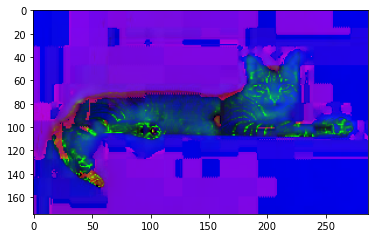

In [33]:
plt.imshow(img_hsv)

In [36]:
cap = cv.VideoCapture(0)
while(1):
    # Take each frame
    _, frame = cap.read()
    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    # Bitwise-AND mask and original image
    res = cv.bitwise_and(frame,frame, mask= mask)
    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break
cap.release()
cv.destroyAllWindows()

### Geometric Transformation of Images

1. Scaling

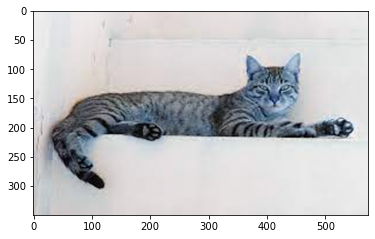

In [37]:
img_scaled = cv.resize(img,None, fx=2, fy=2, interpolation = cv.INTER_CUBIC)
plt.imshow(img_scaled)

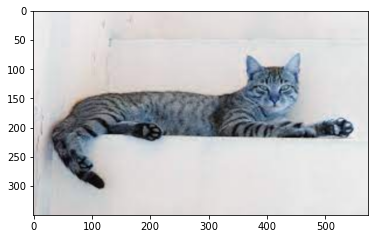

In [41]:
img_linear = cv.resize(img,None, fx=2, fy=2, interpolation = cv.INTER_LINEAR)
plt.imshow(img_linear)

2. Rotation

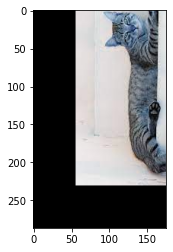

In [45]:
row, col, _ = img.shape
img_rotated_mat = cv.getRotationMatrix2D(((col-1)/2.0, (row-1)/2.0), 90, 1)
img_rotated = cv.warpAffine(img, img_rotated_mat, (row, col))
plt.imshow(img_rotated)